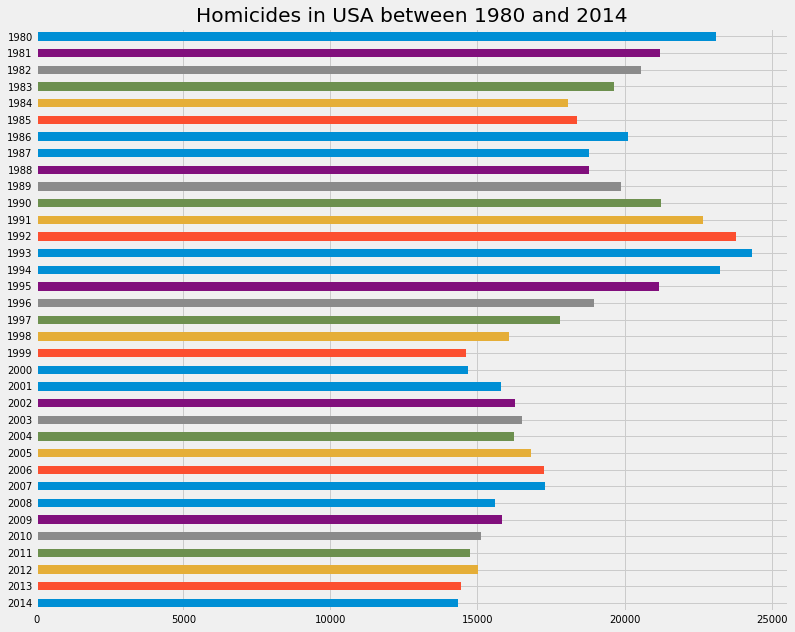

In [1]:
#Visualization with the help of matplotlib on raw data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
#read database
data = pd.read_csv('Visualization.csv', na_values=['NA'], dtype='unicode')
years = pd.DataFrame(data, columns = ['Year']) 
count_years = years.stack().value_counts()
homicides = count_years.sort_index(axis=0, ascending=False)
#plot the total of homicides
homicides.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Homicides in USA between 1980 and 2014');

Text(0,0.5,'')

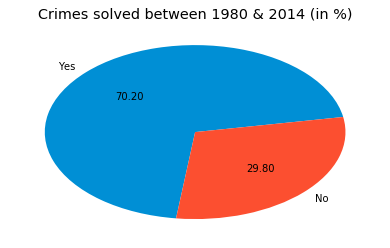

In [2]:
## Rate of crimes solved
solved = pd.DataFrame(data, columns = ['Crime Solved']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie',
                              title = 'Crimes solved between 1980 & 2014 (in %)',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')

Text(0,0.5,'')

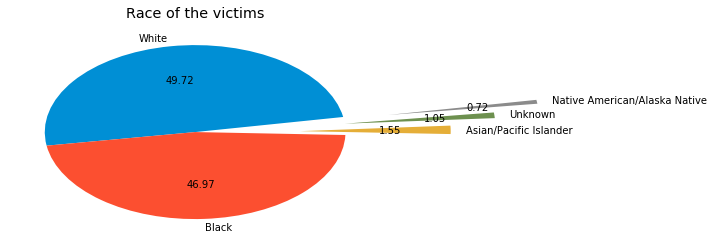

In [3]:
#Race of Victims
race = pd.DataFrame(data, columns = ['Victim Race']) 
count_race = race.stack().value_counts()
ax = count_race.plot(kind = 'pie',
                              title = 'Race of the victims',
                              startangle = 10,
                              autopct='%.2f',
                              explode=(0, 0, 0.7, 1, 1.3))
ax.set_ylabel('')

Text(0,0.5,'')

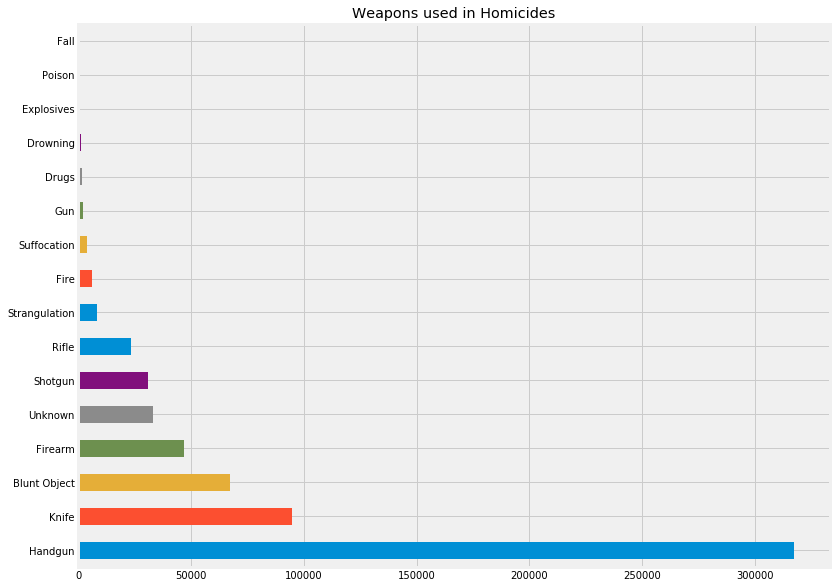

In [4]:
#Weapon
weapon = pd.DataFrame(data, columns = ['Weapon']) 
count_weapon = weapon.stack().value_counts()
ax = count_weapon.plot(kind = 'barh',
                              title = 'Weapons used in Homicides',
                             fontsize=10,  width=0.5,  figsize=(12, 10))
ax.set_ylabel('')

Text(0,0.5,'')

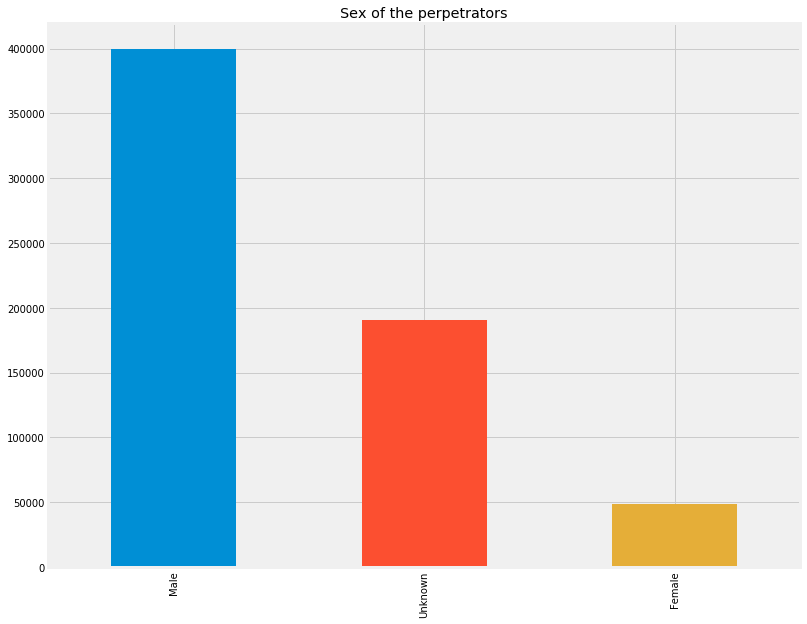

In [5]:
# Sex of the perpetrators
perpetrator_sex = pd.DataFrame(data, columns = ['Perpetrator Sex']) 
count_perpetrator_sex = perpetrator_sex.stack().value_counts()
ax = count_perpetrator_sex.plot(kind = 'bar',
                              title = 'Sex of the perpetrators',
                              fontsize=10,  width=0.5,  figsize=(12, 10))
ax.set_ylabel('')

In [6]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Visualization').getOrCreate()

In [7]:
df = spark.read.csv('Visualization.csv',header=True,inferSchema=True)
df.show()

+---------+------+----+--------+--------+--------------------+------------+----------+----------+--------------------+----------------+---------------+---------------+--------------------+---------------------+------------+-------------+------------+-----------------+-------------+
|Record ID| State|Year|   Month|Incident|          Crime Type|Crime Solved|Victim Sex|Victim Age|         Victim Race|Victim Ethnicity|Perpetrator Sex|Perpetrator Age|    Perpetrator Race|Perpetrator Ethnicity|Relationship|       Weapon|Victim Count|Perpetrator Count|Record Source|
+---------+------+----+--------+--------+--------------------+------------+----------+----------+--------------------+----------------+---------------+---------------+--------------------+---------------------+------------+-------------+------------+-----------------+-------------+
|        1|Alaska|1980| January|       1|Murder or Manslau...|         Yes|      Male|        14|Native American/A...|         Unknown|           Male|

Histograms below: 


([<matplotlib.axis.XTick at 0x7f284a2bed68>,
 <a list of 5 Text xticklabel objects>)

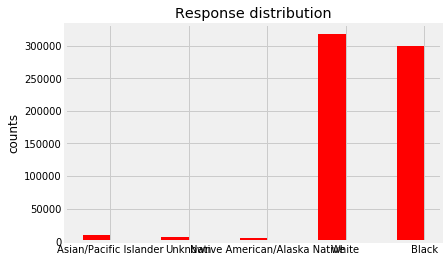

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
print("Histograms below: ")

race = df.groupBy('Victim Race').count().collect() # list of Rows
categories = [i[0] for i in race]
counts = [i[1] for i in race]

ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='r')

plt.ylabel('counts')
plt.title('Response distribution')
plt.xticks(ind + width/2., categories)

Histograms below: 


([<matplotlib.axis.XTick at 0x7f284a180a58>,
 <a list of 3 Text xticklabel objects>)

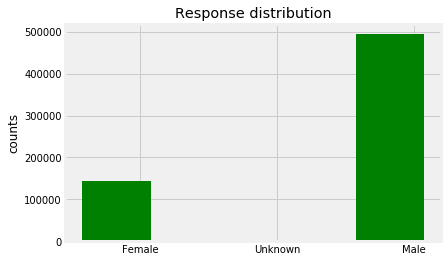

In [9]:
print("Histograms below: ")

vs = df.groupBy('Victim Sex').count().collect() # list of Rows
categories = [i[0] for i in vs]
counts = [i[1] for i in vs]

ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=0.5, color='g')

plt.ylabel('counts')
plt.title('Response distribution')
plt.xticks(ind + width/2., categories)

Histograms below: 


([<matplotlib.axis.XTick at 0x7f284a1b8048>,
 <a list of 3 Text xticklabel objects>)

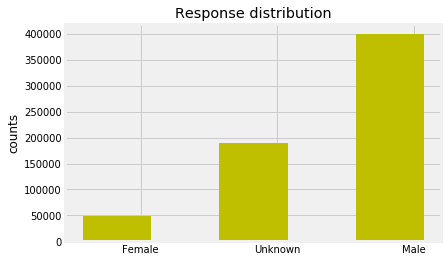

In [10]:
print("Histograms below: ")

ps = df.groupBy('Perpetrator Sex').count().collect() # list of Rows
categories = [i[0] for i in ps]
counts = [i[1] for i in ps]

ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=0.5, color='y')

plt.ylabel('counts')
plt.title('Response distribution')
plt.xticks(ind + width/2., categories)